## Intro


Utiliser l'environnement: _py310_fanalysis_


In [1]:
#changement de dossier
import os
# os.chdir("D:/_Travaux/university/Cours_Universite/Supports_de_cours/DataAnalysis/Stat/Supports/Analyse_Factorielle/Calculs")

In [2]:
#chargement - index_col = 0 pour indiquer que la colonne n°0 est un label
import pandas
import numpy
from fanalysis.ca import CA

In [5]:
os.getcwd()

'/home/francesco/shared_files/python_notebooks/_manuels_tutoriels/Rakotomala_ACM'

In [4]:
D = pandas.read_csv("/home/francesco/shared_files/python_notebooks/_manuels_tutoriels/Rakotomala_ACM/data/femmes_ministres.csv",
                    sep='\t', index_col=0)

#affichage des données
print(D)

#nombre de modalités ligne
K = D.shape[0]

#nombre de modalités colonnes
L = D.shape[1]

                                        GF  DF  GH  DH
metier_vs_genre                                       
agriculteur_commerçant_entrepr_employe   2   2  22  17
profession_liberale                      4  10  10  20
haut_fonctionnaire                      11   7  20  36
cadre_sup_public                         7  12  40  27
cadre_sup_prive                          2   8  11  27
professions_intermediaire                3   4   9   5
collaborateur_politique                  7   2   7  14
autre_ou_manque                          3   1   3   7


In [5]:
#numpy


#effectif total
n = numpy.sum(D.values)
print(n)

#nombre max. de facteur
Hmax = numpy.min([K-1,L-1])
print(Hmax)

360
3


In [6]:
#importation de la librairie


#lancer les calculs
afc = CA(row_labels=D.index,col_labels=D.columns)

In [7]:
afc.fit(D.values)

CA(col_labels=Index(['GF', 'DF', 'GH', 'DH'], dtype='object'),
   row_labels=Index(['agriculteur_commerçant_entrepr_employe', 'profession_liberale',
       'haut_fonctionnaire', 'cadre_sup_public', 'cadre_sup_prive',
       'professions_intermediaire', 'collaborateur_politique',
       'autre_ou_manque'],
      dtype='object', name='metier_vs_genre'))

In [8]:
#propriétés de l'objet
print(dir(afc))

['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__setstate__', '__sizeof__', '__sklearn_clone__', '__str__', '__subclasshook__', '__weakref__', '_build_request_for_signature', '_check_feature_names', '_check_n_features', '_compute_stats', '_compute_svd', '_get_default_requests', '_get_metadata_request', '_get_param_names', '_get_tags', '_more_tags', '_repr_html_', '_repr_html_inner', '_repr_mimebundle_', '_sklearn_auto_wrap_output_keys', '_validate_data', '_validate_params', 'c_', 'col_contrib_', 'col_coord_', 'col_cos2_', 'col_labels', 'col_labels_', 'col_labels_short_', 'col_topandas', 'eig_', 'fit', 'fit_transform', 'get_metadata_routing', 'get_params', 'mapping', 'mapping_col', 'mapping_row', 'model_', 'n_', 'n_components', 'n_compo

In [9]:
#affichage des valeurs propres
print(afc.eig_)

[[6.21251976e-02 3.51813638e-02 1.91213134e-02]
 [5.33593847e+01 3.02173031e+01 1.64233122e+01]
 [5.33593847e+01 8.35766878e+01 1.00000000e+02]]


In [10]:
#seuil -- moyenne des valeurs propres
meanValPropre = numpy.mean(afc.eig_[0])
print(meanValPropre)

#ou seuil sur les pourcentages
print(1/Hmax)

0.038809291587097124
0.3333333333333333


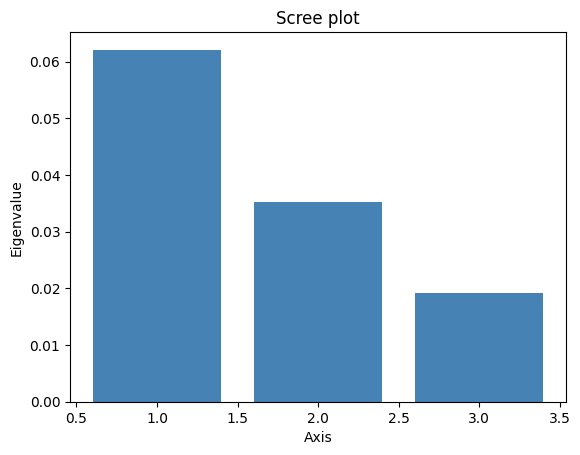

In [11]:
#affichage graphique des v.p.
afc.plot_eigenvalues()

In [12]:
#informations sur les modalités lignes
print(afc.row_topandas())

                                        row_coord_dim1  row_coord_dim2  \
metier_vs_genre                                                          
agriculteur_commerçant_entrepr_employe       -0.340065        0.102674   
profession_liberale                           0.162153       -0.276719   
haut_fonctionnaire                            0.182192        0.106302   
cadre_sup_public                             -0.281437       -0.004352   
cadre_sup_prive                               0.168907       -0.284636   
professions_intermediaire                    -0.204611        0.026675   
collaborateur_politique                       0.318766        0.323941   
autre_ou_manque                               0.345414        0.260901   

                                        row_coord_dim3  row_contrib_dim1  \
metier_vs_genre                                                            
agriculteur_commerçant_entrepr_employe       -0.225600         22.234243   
profession_liberale            

In [13]:
#profil marginal des modalités lignes
profMargLig = numpy.sum(D.values,axis=1)/n
print(profMargLig)

[0.11944444 0.12222222 0.20555556 0.23888889 0.13333333 0.05833333
 0.08333333 0.03888889]


In [14]:
#contributions
contribLig = (numpy.reshape(profMargLig,(8,1))*afc.row_coord_**2)/afc.eig_[0]*100
print(contribLig)

[[2.22342431e+01 3.57913070e+00 3.17926706e+01]
 [5.17287367e+00 2.66021426e+01 1.03699242e+01]
 [1.09829966e+01 6.60240194e+00 2.05949692e+00]
 [3.04573135e+01 1.28578784e-02 5.72892049e+00]
 [6.12302430e+00 3.07047592e+01 1.62640830e+01]
 [3.93104099e+00 1.17984954e-01 3.20687393e+01]
 [1.36299387e+01 2.48564369e+01 1.68713631e+00]
 [7.46856910e+00 7.52428587e+00 2.90292164e-02]]


In [15]:
#distance à l'origine - distance du KHI2
distoLig = numpy.sum(afc.row_coord_**2,axis=1)
print(distoLig)

[0.17708174 0.11909062 0.04640997 0.08381149 0.1328715  0.14769668
 0.21042075 0.18752298]


In [16]:
#cos2 des lignes
cos2Lig = afc.row_coord_**2/numpy.reshape(distoLig,(8,1))*100
print(cos2Lig)

[[6.53055942e+01 5.95320012e+00 2.87412057e+01]
 [2.20786198e+01 6.42986057e+01 1.36227745e+01]
 [7.15234027e+01 2.43486096e+01 4.12798776e+00]
 [9.45061008e+01 2.25934448e-02 5.47130573e+00]
 [2.14715396e+01 6.09744351e+01 1.75540253e+01]
 [2.83457413e+01 4.81783323e-01 7.11724754e+01]
 [4.82896847e+01 4.98705579e+01 1.83975746e+00]
 [6.36246121e+01 3.62992724e+01 7.61154807e-02]]


In [17]:
#statistiques pour les points colonnes
print(afc.col_topandas())

    col_coord_dim1  col_coord_dim2  col_coord_dim3  col_contrib_dim1  \
GF        0.308014        0.382548        0.220554         16.543767   
DF        0.030985       -0.362949        0.242139          0.197459   
GH       -0.335087        0.070052       -0.008701         61.249965   
DH        0.179365       -0.044249       -0.122081         22.008809   

    col_contrib_dim2  col_contrib_dim3  col_cos2_dim1  col_cos2_dim2  \
GF         45.063200         27.559700       0.327305       0.504876   
DF         47.844594         39.180168       0.005018       0.688531   
GH          4.726954          0.134192       0.957507       0.041847   
DH          2.365251         33.125940       0.656118       0.039931   

    col_cos2_dim3  
GF       0.167819  
DF       0.306451  
GH       0.000646  
DH       0.303951  


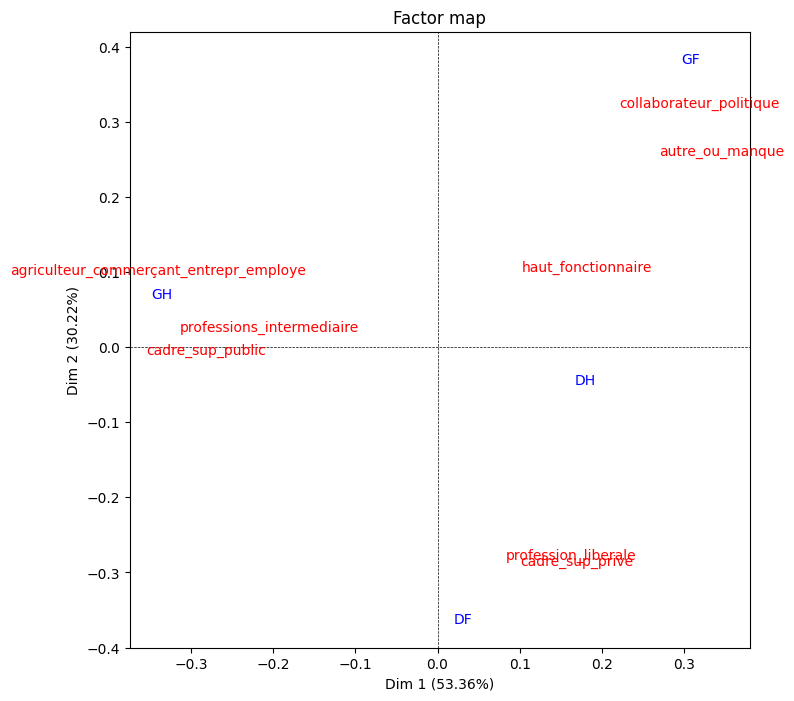

In [18]:
#représentation simultanée
afc.mapping(num_x_axis=1,num_y_axis=2,figsize=(8,8))

In [22]:
afc.mapping())

AttributeError: 'CA' object has no attribute 'plot'

In [45]:
#point supplémentaire
bourgeois = numpy.array([638,537,1084,141])

#coordonnées factorielles
coordBourges = afc.transform(numpy.reshape(bourgeois,(1,4)))
print(coordBourges)

[[-0.20861459  0.26403762  0.73551385]]


In [46]:
#profil marginal des modalités colonnes
profMargCol = numpy.sum(D.values,axis=0)/n
print(profMargCol)

[0.10833333 0.12777778 0.33888889 0.425     ]


In [47]:
#profil des bourgeois
profBourges = bourgeois/numpy.sum(bourgeois)

#distance à l'origine de la modalité supplémentaire
distoBourges = numpy.sum(1/profMargCol*(profBourges-profMargCol)**2)
print(distoBourges)

0.6542165424513189


In [48]:
#COS2 de la représentation
cos2Bourges = (coordBourges**2)/distoBourges
print(cos2Bourges)

[[0.06652239 0.1065639  0.82691371]]


In [49]:
#soit pour récapituler
print(pandas.DataFrame(numpy.transpose([coordBourges[0],cos2Bourges[0]]),index=['Dim.1','Dim.2','Dim.3'],columns=['Coord','Cos2']))

          Coord      Cos2
Dim.1 -0.208615  0.066522
Dim.2  0.264038  0.106564
Dim.3  0.735514  0.826914


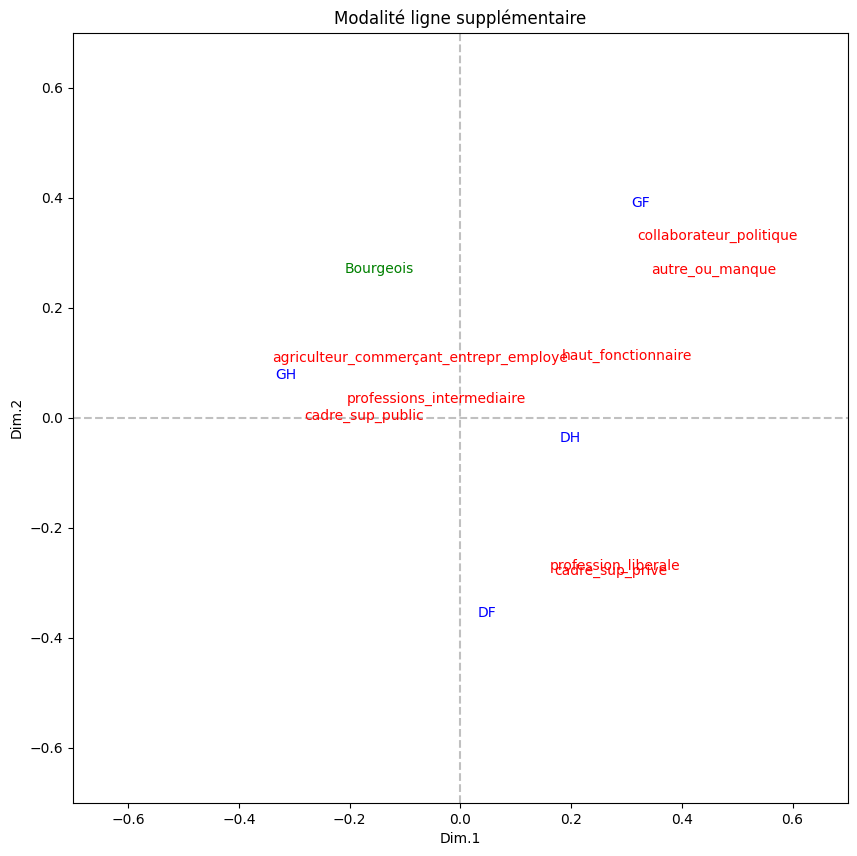

In [50]:
#librairie graphique
import matplotlib.pyplot as plt

#reste à l'ajouter dans le plan factoriel
fig, ax = plt.subplots(figsize=(10,10))
ax.axis([-0.7,+0.7,-0.7,+0.7])
ax.plot([-0.7,+0.7],[0,0],color='silver',linestyle='--')
ax.plot([0,0],[-0.7,+0.7],color='silver',linestyle='--')
ax.set_xlabel("Dim.1")
ax.set_ylabel("Dim.2")
plt.title("Modalité ligne supplémentaire")

#modalités ligne
for i in range(D.shape[0]):
    ax.text(afc.row_coord_[i,0],afc.row_coord_[i,1],D.index[i],color='red')

#modalités colonne
for i in range(D.shape[1]):
    ax.text(afc.col_coord_[i,0],afc.col_coord_[i,1],D.columns[i],color='blue')
    
#point supplémentaire
ax.text(coordBourges[0][0],coordBourges[0][1],"Bourgeois",color='green')
    
plt.show()